In [1]:
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [7]:
previous_data = pd.read_csv('/Users/roger/Projects/coronavirus/Sales_Forecast/data/corona_recovery_formated.csv')

In [8]:
previous_china = previous_data[previous_data['variable'] == 'China_total']

In [37]:
previous_china = previous_china.drop('variable', axis=1)
previous_china.columns = ['y', 'ds']
previous_china['cap'] = 50000

KeyError: "['variable'] not found in axis"

In [39]:
previous_china['cap'] = 50000

In [41]:
m = Prophet(daily_seasonality=False, weekly_seasonality=False, growth = 'logistic')
m.add_country_holidays('CN')
m.fit(previous_china, )

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


In [42]:
future = m.make_future_dataframe(periods=50)
future.tail()

,ds
71,2020-04-02
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ValueError: Capacities must be supplied for logistic growth in column 'cap'

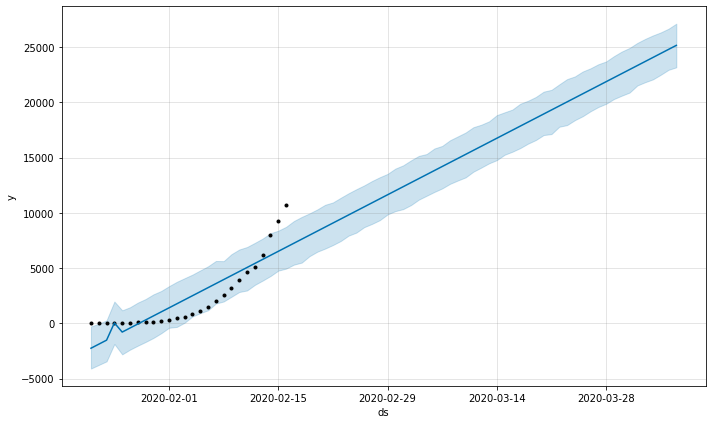

In [44]:
fig1 = m.plot(forecast)

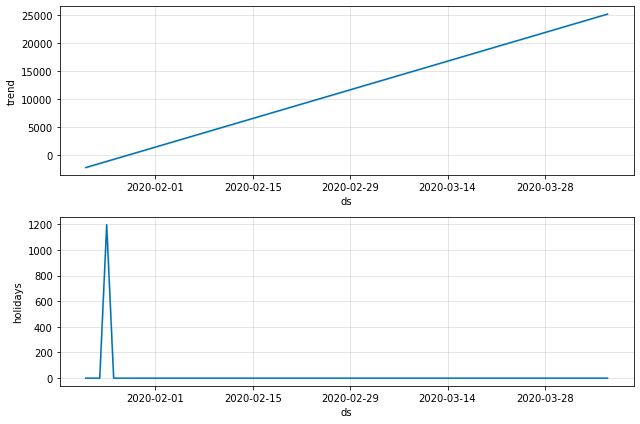

In [32]:
fig2 = m.plot_components(forecast)
